In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df0 = pd.read_csv ('meteo-nogal-09.csv', engine='python')
df1 = pd.read_csv ('soil-nogal-09.csv', engine='python')

In [3]:
meteo= pd.DataFrame(df0)
suel= pd.DataFrame(df1)

In [4]:
meteo.head()

,DATE,TIME,Unnamed: 2,Unnamed: 3,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,...,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35
0,TS,NaN,NaN,NaN,m/s,m/s,m/s,degC,mV,w/m2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01-01-09,00:10,1.0,NaN,1.215,0.506,-0.044,10.95,1.159,-176.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01-01-09,00:20,1.0,NaN,0.892,0.588,-0.072,10.81,1.159,-176.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01-01-09,00:30,1.0,NaN,1.227,0.6850001,-0.06900001,10.34,1.224,-175.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01-01-09,00:40,1.0,NaN,1.135,0.7410001,-0.093,9.8,1.258,-182.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
suel.head()

,id,2 Year_RTM L,3 Day_RTM L,4 Hour_Minute_RTM L,5 T108v_1_AVG L,6 T108v_2_AVG L,7 T108v_3_AVG L,8 T108v_4_AVG L,9 T108v_5_AVG L,10 T108v_6_AVG L,...,THETA_20cm.1,THETA_30cm.1,THETA_40cm.1,THETA_55cm.1,THETA_70cm.1,THETA_85cm.1,THETA_100cm.1,62 batt L.1,63 lluvia_TOT L,Rs (splite).1
0,147,2009,1,30,0.959,0.972,0.992,1.004,1.027,1.063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,147,2009,1,100,0.958,0.972,0.993,1.004,1.027,1.063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,147,2009,1,130,0.956,0.972,0.993,1.004,1.027,1.063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,147,2009,1,200,0.955,0.972,0.993,1.005,1.027,1.063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,147,2009,1,230,0.953,0.972,0.994,1.005,1.027,1.063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Primero elimino las columnas innecesarias 
meteo.drop(meteo.columns[18:36],axis=1,inplace=True) 
meteo.drop(meteo.columns[2:4],axis=1,inplace=True)
meteo=meteo.drop(index=0) #Quito el primer renglon que cuenta con las unidade de cada columna 
meteo=meteo.reset_index(drop=True) #Reinicio el indice
meteo['Fecha']=meteo['DATE'] + ' ' + meteo['TIME'] #Uno las columnas DATE y TIME en una sola columna llamada Fecha 
meteo.drop(['DATE', 'TIME'],axis=1,inplace=True) #Me deshago de las columnas que ya no utilizare 
meteo['Fecha'] = pd.to_datetime(meteo['Fecha']) #Convierto la columna Fecha al tipo datetime
meteo[meteo.columns[0:14]]=meteo[meteo.columns[0:14]].apply(pd.to_numeric, errors='coerce') #Convierto las columnas restantes a tipo numerico
meteo=meteo.drop(meteo.index[meteo['Fecha'] >='2010-01-01']) #Me quedo con datos del año 2009
meteo.tail()

,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg,Fecha
52332,0.736,-0.135,12.49,1050.0,-76.38,NaN,NaN,2.595,12.82,0.482,1.480,0.713,5.405,NaN,2009-12-31 23:10:00
52333,0.711,-0.106,12.24,1047.0,-75.03,NaN,NaN,2.517,12.62,0.489,1.460,0.714,5.416,NaN,2009-12-31 23:20:00
52334,0.746,-0.116,11.90,1043.0,-74.88,NaN,NaN,2.380,12.30,0.500,1.430,0.715,5.428,NaN,2009-12-31 23:30:00
52335,0.641,-0.084,11.53,1054.0,-71.33,NaN,NaN,2.182,11.88,0.509,1.391,0.708,5.383,NaN,2009-12-31 23:40:00
52336,0.538,-0.075,11.31,1064.0,-69.40,NaN,NaN,2.102,11.54,0.516,1.360,0.701,5.338,NaN,2009-12-31 23:50:00


In [7]:
meteo.dtypes

u_Avg                 float64
v_Avg                 float64
w_Avg                 float64
t_Avg                 float64
kh20_Avg              float64
net_rad_Avg           float64
shf1_Avg              float64
shf2_Avg              float64
vv_Avg                float64
airT_Avg              float64
rh_Avg                float64
e_sat_Avg             float64
e_Avg                 float64
h2o_hmp_Avg           float64
Fecha          datetime64[ns]
dtype: object

In [8]:
suel.dtypes

id                        int64
2 Year_RTM  L             int64
3 Day_RTM  L              int64
4 Hour_Minute_RTM  L      int64
5 T108v_1_AVG  L        float64
6 T108v_2_AVG  L        float64
7 T108v_3_AVG  L        float64
8 T108v_4_AVG  L        float64
9 T108v_5_AVG  L        float64
10 T108v_6_AVG  L       float64
11 T108v_7_AVG  L       float64
12 T108v_8_AVG  L       float64
Tsuelo_10cm             float64
Tsuelo_20cm             float64
Tsuelo_30cm             float64
Tsuelo_40cm             float64
Tsuelo_55cm             float64
Tsuelo_70cm             float64
Tsuelo_85cm             float64
Tsuelo_100cm            float64
21 Tref_AVG  L          float64
22 period_1  L          float64
23 period_2  L          float64
24 period_3  L          float64
25 period_4  L          float64
26 period_5  L          float64
27 period_6  L          float64
28 period_7  L          float64
29 period_8  L          float64
30 TVWC_1  L            float64
                         ...   
35 TVWC_

In [9]:
#Ahora creo un DataFrame temporal para la fecha con los datos del DataFrame "suel"
temp=suel.filter(items=["2 Year_RTM  L","3 Day_RTM  L", "4 Hour_Minute_RTM  L"],axis=1)
temp.rename(columns={"2 Year_RTM  L":"Año","3 Day_RTM  L":"Dia", "4 Hour_Minute_RTM  L":"Hora"},inplace=True) #Renombro las variables para facilitar la escritura despues

#Este loop es para cambiar el dato del dia que corresponde a la hora 2400 y que coincida con la fecha del DataFrame "meteo"
#Consiste en sumarle un 1 al dato del dia que corresponde a la hora 2400
r=len(suel)-1
for i in range (0,r):
    if(temp['Hora'][i] == 2400):
        temp['Dia'][i]=temp['Dia'][i+1]

        
temp['Hora']=temp['Hora'].astype(str).replace(regex={r'30$':r':30',r'00$':r':00',r'^:30':r'0:30',r'24:00':r'00:00'}) # Modificamos los datos de la columna hora para 
                                                                                                                     # darle el formato necesario para despues poder
                                                                                                                     # cambiarlo al tipo fecha 
temp['Año']=pd.to_datetime(temp['Año'].astype(str), format='%Y') # Cambiamos al tipo Datetime la columna de Año con el formato de año 
temp['Dia']=pd.to_datetime(temp['Dia'].astype(str), format='%j') # Cambiamos al tipo Datetime la columna de Dia con el formato de dia julinao
temp['Hora']=pd.to_datetime(temp['Hora'].astype(str), format='%H:%M') # Cambiamos al tipo Datetime la columna de Hora con el formato "Hora:Minuto"

temp['Año']=temp['Año'].dt.year #De la columna Año obtengo solamente el año
temp['Mes']=temp['Dia'].dt.month #De la columna Dia obtengo el mes
temp['Dia']=temp['Dia'].dt.day #De la columna Dia obtengo el dia 
temp['Min']=temp['Hora'].dt.minute #De la columna Hora obtengo los minutos 
temp['Hora']=temp['Hora'].dt.hour #De la columna Hora obtengo la hora 

#Uno todos los datos obtenidos anteriormente en orden de Año-Mes-Dia Hora:Minuto en una columna llamda Fecha
temp['Fecha']=temp['Año'].astype(str)+' '+temp['Mes'].astype(str)+' '+temp['Dia'].astype(str)+' '+temp['Hora'].astype(str)+' '+temp['Min'].astype(str)

temp['Fecha']=pd.to_datetime(temp['Fecha'], format='%Y %m %d %H %M') #Cambio al tipo Datetime la columna Fecha con el formato Año-Mes-Dia Hora:Minuto
temp.drop(['Año', 'Mes','Dia','Hora','Min'],axis=1,inplace=True) #Me deshago de las columnas que ya no utilizare
temp.head(49)

,Fecha
0,2009-01-01 00:30:00
1,2009-01-01 01:00:00
2,2009-01-01 01:30:00
3,2009-01-01 02:00:00
4,2009-01-01 02:30:00
5,2009-01-01 03:00:00
6,2009-01-01 03:30:00
7,2009-01-01 04:00:00
8,2009-01-01 04:30:00
9,2009-01-01 05:00:00


In [10]:
#Del DataFrame "suel" tomo solo las columnas que vol a utilizar y las guardo en otro DataFrame temporal  
temp2=suel.filter(items=["Tsuelo_10cm","Tsuelo_20cm","Tsuelo_30cm","Tsuelo_40cm","Tsuelo_55cm","Tsuelo_70cm","Tsuelo_85cm","Tsuelo_100cm"],axis=1)
suelo=pd.concat([temp,temp2],axis=1) #En un nuevo DataFrame junto ambos DataFrame temporales y lo llamo "suelo"
suelo.head()

,Fecha,Tsuelo_10cm,Tsuelo_20cm,Tsuelo_30cm,Tsuelo_40cm,Tsuelo_55cm,Tsuelo_70cm,Tsuelo_85cm,Tsuelo_100cm
0,2009-01-01 00:30:00,14.36,14.70,15.22,15.52,16.11,17.02,17.75,18.62
1,2009-01-01 01:00:00,14.33,14.70,15.24,15.52,16.11,17.02,17.75,18.62
2,2009-01-01 01:30:00,14.28,14.69,15.24,15.54,16.11,17.02,17.74,18.62
3,2009-01-01 02:00:00,14.24,14.69,15.25,15.55,16.12,17.02,17.74,18.60
4,2009-01-01 02:30:00,14.19,14.69,15.27,15.55,16.12,17.02,17.73,18.60


In [11]:
suelo = suelo.drop_duplicates(subset=['Fecha']) #Me deshago de los datos duplicados 
suelo= suelo.reset_index(drop=True) #Reinicio el indice

In [12]:
meteo['Min']=meteo['Fecha'].dt.minute #En el DataFrame meteo obtengo los minutos de la columna fecha
meteo = meteo[((meteo['Min'] == 30.0) | (meteo['Min'] == 0.0) ) & (meteo['Fecha']<='2009-12-31 023:30:00')] #Aqui selecciono solo los datos que son cada 30 minutos
                                                                                                            #Y que son solo del 2009
meteo = meteo.reset_index(drop=True) #Reinicio el inidice 
meteo.drop(['Min'],axis=1,inplace=True) #me deshago de la columna de los minutos pues ya no los necesitare

In [13]:
comb=pd.merge(suelo,meteo,on=['Fecha']) #En un nuevo DataFrame llamado "comb" combino ambos DataFrames, "suelo" y "meteo", basandome en la columna de Fecha
comb.head()

,Fecha,Tsuelo_10cm,Tsuelo_20cm,Tsuelo_30cm,Tsuelo_40cm,Tsuelo_55cm,Tsuelo_70cm,Tsuelo_85cm,Tsuelo_100cm,u_Avg,...,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg
0,2009-01-01 00:30:00,14.36,14.70,15.22,15.52,16.11,17.02,17.75,18.62,1.227,...,1.224,-175.5,23.61,-26.46,1.421,9.059999,0.896,1.152,1.032,7.926001
1,2009-01-01 01:00:00,14.33,14.70,15.24,15.52,16.11,17.02,17.75,18.62,0.885,...,1.450,-183.4,23.33,-26.98,1.390,8.340000,0.840,1.097,0.921,7.089000
2,2009-01-01 01:30:00,14.28,14.69,15.24,15.54,16.11,17.02,17.74,18.62,0.118,...,1.422,-187.8,24.04,-27.16,1.338,7.539001,0.846,1.039,0.879,6.787000
3,2009-01-01 02:00:00,14.24,14.69,15.25,15.55,16.12,17.02,17.74,18.60,0.755,...,1.360,-174.0,20.87,-21.68,1.457,6.760000,0.902,0.985,0.888,6.876000
4,2009-01-01 02:30:00,14.19,14.69,15.27,15.55,16.12,17.02,17.73,18.60,1.080,...,1.404,-170.7,18.15,-21.55,1.422,7.288001,0.845,1.021,0.863,6.669000


In [14]:
#Filtro solo las columnas que utilizare del DataFrame comb
comb = comb.filter(['Fecha','Tsuelo_10cm','Tsuelo_20cm','Tsuelo_30cm','Tsuelo_40cm','Tsuelo_55cm','Tsuelo_70cm','Tsuelo_85cm','Tsuelo_100cm','airT_Avg','net_rad_Avg'],axis=1)
comb.head()

,Fecha,Tsuelo_10cm,Tsuelo_20cm,Tsuelo_30cm,Tsuelo_40cm,Tsuelo_55cm,Tsuelo_70cm,Tsuelo_85cm,Tsuelo_100cm,airT_Avg,net_rad_Avg
0,2009-01-01 00:30:00,14.36,14.70,15.22,15.52,16.11,17.02,17.75,18.62,9.059999,-175.5
1,2009-01-01 01:00:00,14.33,14.70,15.24,15.52,16.11,17.02,17.75,18.62,8.340000,-183.4
2,2009-01-01 01:30:00,14.28,14.69,15.24,15.54,16.11,17.02,17.74,18.62,7.539001,-187.8
3,2009-01-01 02:00:00,14.24,14.69,15.25,15.55,16.12,17.02,17.74,18.60,6.760000,-174.0
4,2009-01-01 02:30:00,14.19,14.69,15.27,15.55,16.12,17.02,17.73,18.60,7.288001,-170.7


In [15]:
#En la actividad se me pide seleccionar un dia y graficar las temperaturas del suelo y el aire 
#El dia que seleccione fue el 16 de enero, para eso en un nuevo DataFrame:
comb1=comb[comb['Fecha']>='2009-01-16 00:00:00'] #Selecciono los datos donde la fecha es mayor o igual al 16 de enero a las 00:00
comb1=comb1[comb1['Fecha']< '2009-01-17 00:00:00'] #Y datos que sean menores al 17 de enero a las 00:00
comb1=comb1.reset_index(drop=True) #Reinicio el indice
len(comb1) #Al ser un solo dia y con datos tomados cada 30 min, comprobamos que la cantidad de datos sea 48 

48

<Figure size 432x288 with 0 Axes>

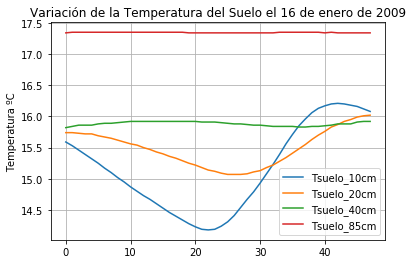

In [16]:
#Grafica de la temperatura del suelo a diferentes profundidades en un dia de Enero 
graf1 = comb1[['Tsuelo_10cm','Tsuelo_20cm','Tsuelo_40cm','Tsuelo_85cm']]
plt.figure(); graf1.plot(); plt.legend(loc='best')
plt.title("Variación de la Temperatura del Suelo el 16 de enero de 2009")
plt.ylabel("Temperatura ºC")
plt.grid(True)
plt.show()

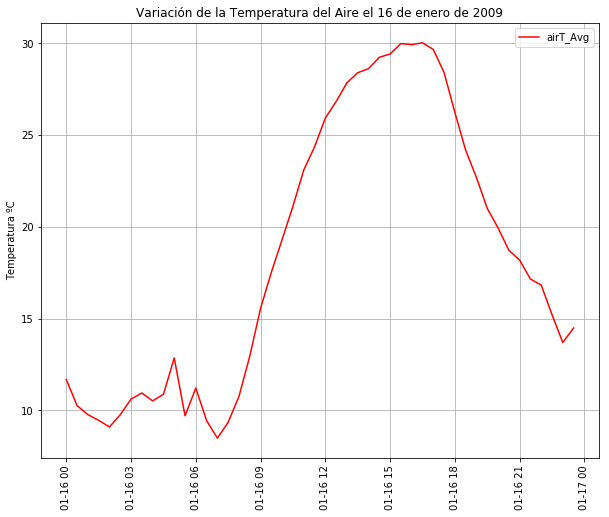

In [17]:
#Grafica de la temperatura del aire en un dia de Enero 
plt.figure(figsize=[10,8])
plt.plot_date(x=comb1.Fecha, y=comb1.airT_Avg, fmt="r-")
plt.legend(loc='best')
plt.title("Variación de la Temperatura del Aire el 16 de enero de 2009")
plt.xticks(color = 'k',rotation = 90)
plt.ylabel("Temperatura ºC")
plt.grid(True)
plt.show()

El siguiente punto de la actividad nos pide graficar las temperaturas maxima, minima y promedio del año completo para el aire y las diferentes profundidades del suelo. Para esto creare diferentes DataFrames para cada profundidad diferente:

**comb2** es para el suelo a 10 cm.

**comb3** es para el suelo a 20 cm.

**comb4** es para el suelo a 40 cm.

**comb5** es para el suelo a 85 cm.

**comb6** es para el aire.

**Como cada grafica es basicamente el mismo procedimiento, solo explicare la primera.**

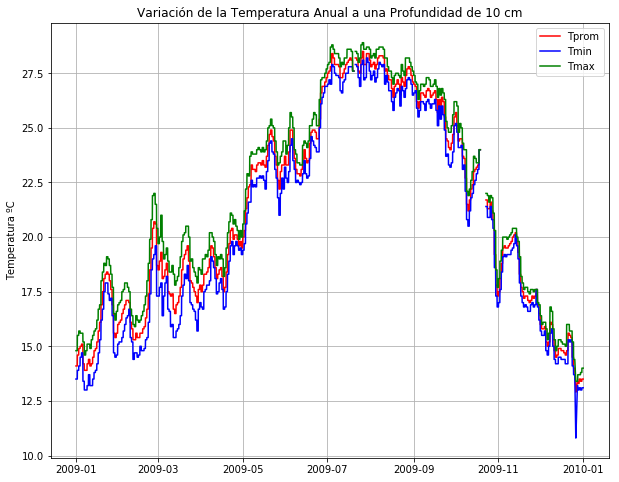

In [18]:
comb2=comb.filter(['Tsuelo_10cm','Fecha']) #Filtro las columnas a utilizar en el nuevo DataFrame
#De la columna Fecha obtengo:
comb2['Mes']=comb2['Fecha'].dt.month #El mes
comb2['Dia']=comb2['Fecha'].dt.day # El dia 
#Ahora con la funcion groupby obtengo:
comb2['Tprom']=round(comb2.groupby(['Mes','Dia'])['Tsuelo_10cm'].transform(np.mean),1) #La temperatura promedio
comb2['Tmax']=round(comb2.groupby(['Mes','Dia'])['Tsuelo_10cm'].transform(np.max),1) #La temperatura maxima
comb2['Tmin']=round(comb2.groupby(['Mes','Dia'])['Tsuelo_10cm'].transform(np.min),1) #La temperatura minima

#Grafico las diferentes temperaturas obtenidad contra el tiempo 
plt.figure(figsize=[10,8])
plt.plot_date(x=comb2.Fecha, y=comb2.Tprom, fmt="r-")
plt.plot_date(x=comb2.Fecha, y=comb2.Tmin, fmt="b-")
plt.plot_date(x=comb2.Fecha, y=comb2.Tmax, fmt="g-")
plt.legend(loc='best')
plt.title("Variación de la Temperatura Anual a una Profundidad de 10 cm")
plt.ylabel("Temperatura ºC")
plt.grid(True)
plt.show()

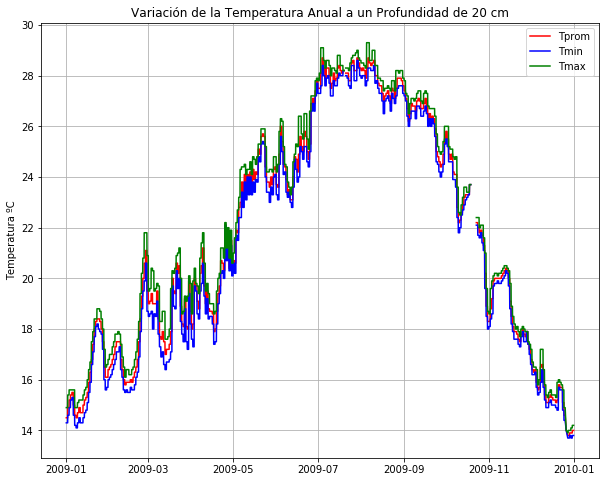

In [32]:
comb3=comb.filter(['Tsuelo_20cm','Fecha'])
comb3['Mes']=comb3['Fecha'].dt.month
comb3['Dia']=comb3['Fecha'].dt.day
comb3['Tprom']=round(comb3.groupby(['Mes','Dia'])['Tsuelo_20cm'].transform(np.mean),1)
comb3['Tmax']=round(comb3.groupby(['Mes','Dia'])['Tsuelo_20cm'].transform(np.max),1)
comb3['Tmin']=round(comb3.groupby(['Mes','Dia'])['Tsuelo_20cm'].transform(np.min),1)

plt.figure(figsize=[10,8])
plt.plot_date(x=comb3.Fecha, y=comb3.Tprom, fmt="r-")
plt.plot_date(x=comb3.Fecha, y=comb3.Tmin, fmt="b-")
plt.plot_date(x=comb3.Fecha, y=comb3.Tmax, fmt="g-")
plt.legend(loc='best')
plt.title("Variación de la Temperatura Anual a un Profundidad de 20 cm")
plt.ylabel("Temperatura ºC")
plt.grid(True)
plt.show()

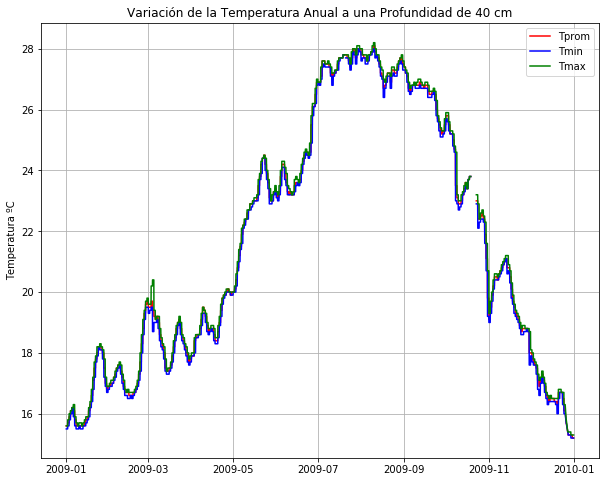

In [20]:
comb4=comb.filter(['Tsuelo_40cm','Fecha'])
comb4['Mes']=comb4['Fecha'].dt.month
comb4['Dia']=comb4['Fecha'].dt.day
comb4['Tprom']=round(comb4.groupby(['Mes','Dia'])['Tsuelo_40cm'].transform(np.mean),1)
comb4['Tmax']=round(comb4.groupby(['Mes','Dia'])['Tsuelo_40cm'].transform(np.max),1)
comb4['Tmin']=round(comb4.groupby(['Mes','Dia'])['Tsuelo_40cm'].transform(np.min),1)

plt.figure(figsize=[10,8])
plt.plot_date(x=comb4.Fecha, y=comb4.Tprom, fmt="r-")
plt.plot_date(x=comb4.Fecha, y=comb4.Tmin, fmt="b-")
plt.plot_date(x=comb4.Fecha, y=comb4.Tmax, fmt="g-")
plt.legend(loc='best')
plt.title("Variación de la Temperatura Anual a una Profundidad de 40 cm")
plt.ylabel("Temperatura ºC")
plt.grid(True)
plt.show()

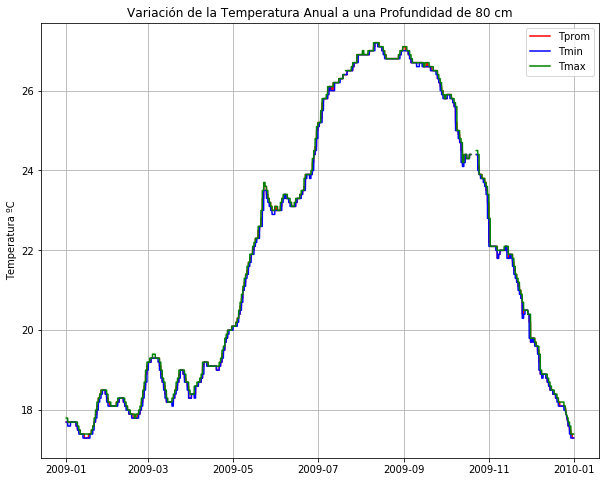

In [21]:
comb5=comb.filter(['Tsuelo_85cm','Fecha'])
comb5['Mes']=comb5['Fecha'].dt.month
comb5['Dia']=comb5['Fecha'].dt.day
comb5['Tprom']=round(comb5.groupby(['Mes','Dia'])['Tsuelo_85cm'].transform(np.mean),1)
comb5['Tmax']=round(comb5.groupby(['Mes','Dia'])['Tsuelo_85cm'].transform(np.max),1)
comb5['Tmin']=round(comb5.groupby(['Mes','Dia'])['Tsuelo_85cm'].transform(np.min),1)

plt.figure(figsize=[10,8])
plt.plot_date(x=comb5.Fecha, y=comb5.Tprom, fmt="r-")
plt.plot_date(x=comb5.Fecha, y=comb5.Tmin, fmt="b-")
plt.plot_date(x=comb5.Fecha, y=comb5.Tmax, fmt="g-")
plt.legend(loc='best')
plt.title("Variación de la Temperatura Anual a una Profundidad de 80 cm")
plt.ylabel("Temperatura ºC")
plt.grid(True)
plt.show()

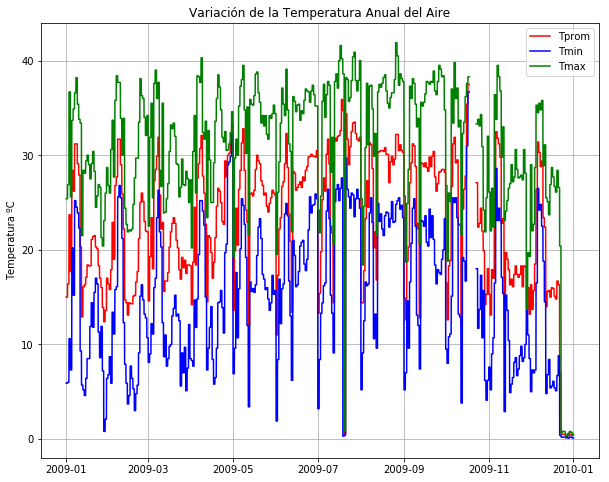

In [22]:
comb6=comb.filter(['airT_Avg','Fecha'])
comb6['Mes']=comb6['Fecha'].dt.month
comb6['Dia']=comb6['Fecha'].dt.day
comb6['Tprom']=round(comb6.groupby(['Mes','Dia'])['airT_Avg'].transform(np.mean),1)
comb6['Tmax']=round(comb6.groupby(['Mes','Dia'])['airT_Avg'].transform(np.max),1)
comb6['Tmin']=round(comb6.groupby(['Mes','Dia'])['airT_Avg'].transform(np.min),1)

plt.figure(figsize=[10,8])
plt.plot_date(x=comb6.Fecha, y=comb6.Tprom, fmt="r-")
plt.plot_date(x=comb6.Fecha, y=comb6.Tmin, fmt="b-")
plt.plot_date(x=comb6.Fecha, y=comb6.Tmax, fmt="g-")
plt.legend(loc='best')
plt.title("Variación de la Temperatura Anual del Aire")
plt.ylabel("Temperatura ºC")
plt.grid(True)
plt.show()

In [23]:
#Otro de los puntos es graficar las temperaturas cada 30 minutos durante el mes de enero
#Para esto creo otro DataFrame que contenga solo datos de enero llamado "ult"
ult=comb[comb['Fecha']< '2009-02-01 00:00:00']
ult=ult.reset_index(drop=True)

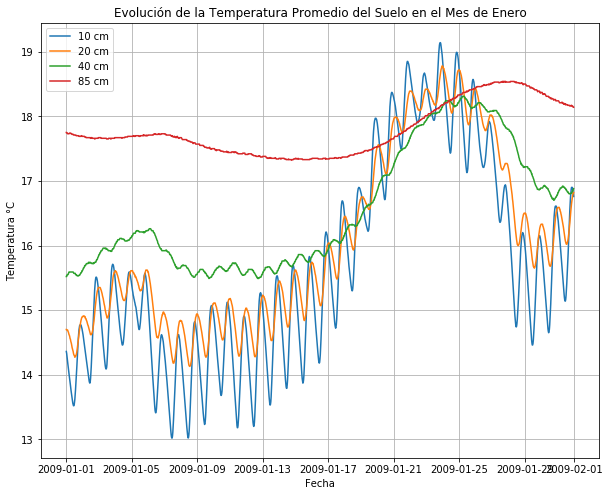

In [24]:
#Grafica para las temperaturas del suelo a diferentes profundidades
plt.figure(figsize=[10,8])
x=ult['Fecha'] #En el eje de las x etsra la fecha
y1=ult['Tsuelo_10cm'] #temperatura del suelo a 10 cm
y2=ult['Tsuelo_20cm'] #Temperatura del suelo a 20 cm
y3=ult['Tsuelo_40cm'] #Temperatura del suelo a 40 cm
y4=ult['Tsuelo_85cm'] #Temperutura del suelo a 85 cm 
plt.plot(x, y1) #Grafico x vs. y1
plt.plot(x, y2) #Grafico x vs. y2
plt.plot(x, y3) #Grafico x vs. y3
plt.plot(x, y4) #Grafico x vs. y4
plt.legend(["10 cm","20 cm","40 cm","85 cm"],loc='best') #Agrego una leyenda a la grafica
plt.title("Evolución de la Temperatura Promedio del Suelo en el Mes de Enero") #Titulo de la grafica
plt.ylabel("Temperatura °C") #Nombre del eje y
plt.xlabel("Fecha") #Nombre del eje x
plt.grid(True)
plt.show()

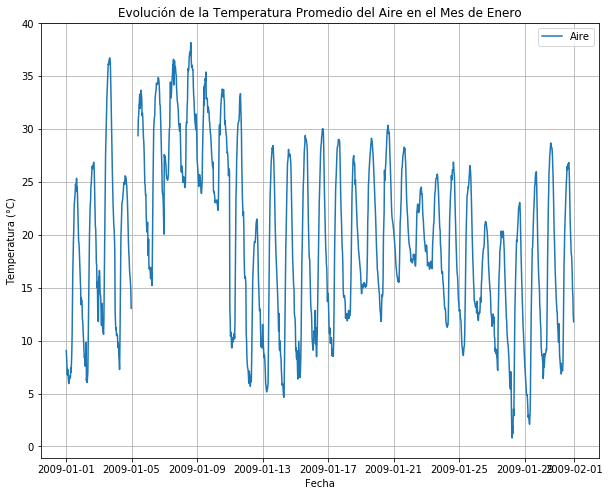

In [25]:
plt.figure(figsize=[10,8])
x=ult['Fecha'] #Le asigno el valor de la fecha a x 
y=ult['airT_Avg'] #temperatura del Aire
plt.plot(x, y) #Grafico x vs y
plt.legend(["Aire"],loc='best') #Agrego una leyenda a la grafica
plt.title("Evolución de la Temperatura Promedio del Aire en el Mes de Enero") #Titulo de la grafica
plt.ylabel("Temperatura (°C)") #Nombre del eje y
plt.xlabel("Fecha") #Nombre del eje x
plt.grid(True)
plt.show()

**Ahora utilizare el rolling mean para suavisar las graficas**

In [26]:
comb2roll=pd.DataFrame(comb2)
comb3roll=pd.DataFrame(comb3)
comb4roll=pd.DataFrame(comb4)
comb5roll=pd.DataFrame(comb5)
comb6roll=pd.DataFrame(comb6)

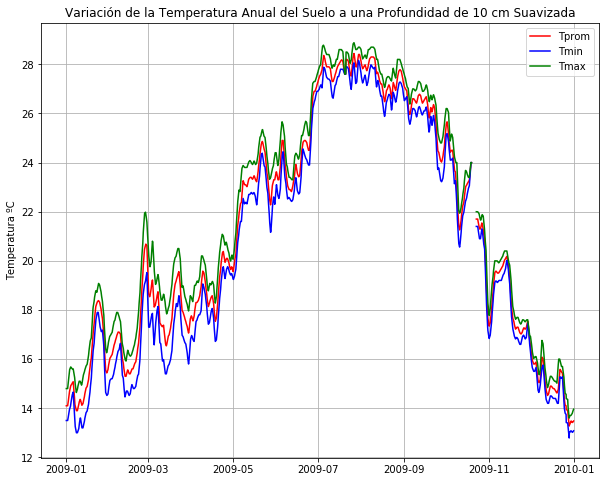

In [35]:
comb2roll['TmaxRoll']=comb2.Tmax.rolling(60, min_periods=1).mean()
comb2roll['TminRoll']=comb2.Tmin.rolling(60, min_periods=1).mean()
comb2roll['TpromRoll']=comb2.Tprom.rolling(60, min_periods=1).mean()

plt.figure(figsize=[10,8])
plt.plot_date(x=comb2.Fecha, y=comb2roll.TpromRoll, fmt="r-")
plt.plot_date(x=comb2.Fecha, y=comb2roll.TminRoll, fmt="b-")
plt.plot_date(x=comb2.Fecha, y=comb2roll.TmaxRoll, fmt="g-")
plt.legend(['Tprom','Tmin','Tmax'],loc='best')
plt.title("Variación de la Temperatura Anual del Suelo a una Profundidad de 10 cm Suavizada")
plt.ylabel("Temperatura ºC")
plt.grid(True)
plt.show()

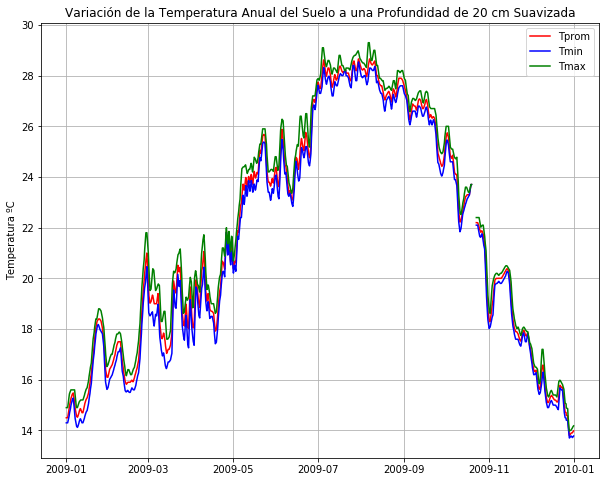

In [37]:
comb3roll['TmaxRoll']=comb3.Tmax.rolling(60, min_periods=1).mean()
comb3roll['TminRoll']=comb3.Tmin.rolling(60, min_periods=1).mean()
comb3roll['TpromRoll']=comb3.Tprom.rolling(60, min_periods=1).mean()

plt.figure(figsize=[10,8])
plt.plot_date(x=comb3.Fecha, y=comb3roll.TpromRoll, fmt="r-")
plt.plot_date(x=comb3.Fecha, y=comb3roll.TminRoll, fmt="b-")
plt.plot_date(x=comb3.Fecha, y=comb3roll.TmaxRoll, fmt="g-")
plt.legend(['Tprom','Tmin','Tmax'],loc='best')
plt.title("Variación de la Temperatura Anual del Suelo a una Profundidad de 20 cm Suavizada")
plt.ylabel("Temperatura ºC")
plt.grid(True)
plt.show()

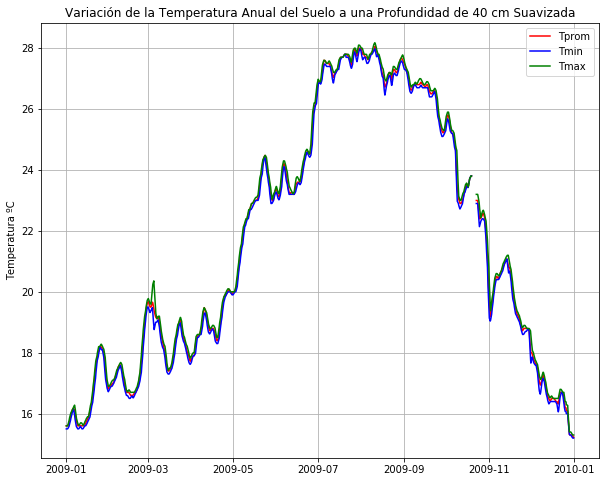

In [39]:
comb4roll['TmaxRoll']=comb4.Tmax.rolling(60, min_periods=1).mean()
comb4roll['TminRoll']=comb4.Tmin.rolling(60, min_periods=1).mean()
comb4roll['TpromRoll']=comb4.Tprom.rolling(60, min_periods=1).mean()

plt.figure(figsize=[10,8])
plt.plot_date(x=comb4.Fecha, y=comb4roll.TpromRoll, fmt="r-")
plt.plot_date(x=comb4.Fecha, y=comb4roll.TminRoll, fmt="b-")
plt.plot_date(x=comb4.Fecha, y=comb4roll.TmaxRoll, fmt="g-")
plt.legend(['Tprom','Tmin','Tmax'],loc='best')
plt.title("Variación de la Temperatura Anual del Suelo a una Profundidad de 40 cm Suavizada")
plt.ylabel("Temperatura ºC")
plt.grid(True)
plt.show()

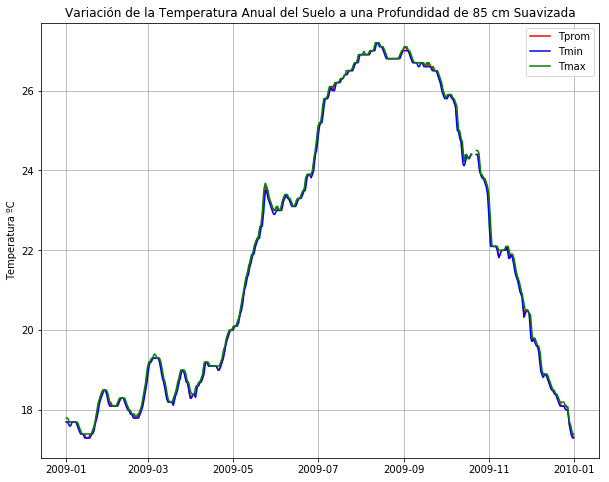

In [40]:
comb5roll['TmaxRoll']=comb5.Tmax.rolling(60, min_periods=1).mean()
comb5roll['TminRoll']=comb5.Tmin.rolling(60, min_periods=1).mean()
comb5roll['TpromRoll']=comb5.Tprom.rolling(60, min_periods=1).mean()

plt.figure(figsize=[10,8])
plt.plot_date(x=comb5.Fecha, y=comb5roll.TpromRoll, fmt="r-")
plt.plot_date(x=comb5.Fecha, y=comb5roll.TminRoll, fmt="b-")
plt.plot_date(x=comb5.Fecha, y=comb5roll.TmaxRoll, fmt="g-")
plt.legend(['Tprom','Tmin','Tmax'],loc='best')
plt.title("Variación de la Temperatura Anual del Suelo a una Profundidad de 85 cm Suavizada")
plt.ylabel("Temperatura ºC")
plt.grid(True)
plt.show()

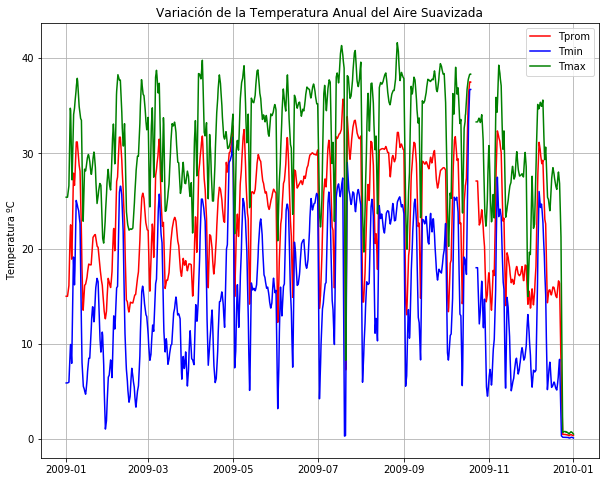

In [41]:
comb6roll['TmaxRoll']=comb6.Tmax.rolling(60, min_periods=1).mean()
comb6roll['TminRoll']=comb6.Tmin.rolling(60, min_periods=1).mean()
comb6roll['TpromRoll']=comb6.Tprom.rolling(60, min_periods=1).mean()

plt.figure(figsize=[10,8])
plt.plot_date(x=comb6.Fecha, y=comb6roll.TpromRoll, fmt="r-")
plt.plot_date(x=comb6.Fecha, y=comb6roll.TminRoll, fmt="b-")
plt.plot_date(x=comb6.Fecha, y=comb6roll.TmaxRoll, fmt="g-")
plt.legend(['Tprom','Tmin','Tmax'],loc='best')
plt.title("Variación de la Temperatura Anual del Aire Suavizada")
plt.ylabel("Temperatura ºC")
plt.grid(True)
plt.show()